<a href="https://colab.research.google.com/github/Panos-Bletsos/spark-curve-fitting/blob/master/Curve_fitting_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib ipympl
%matplotlib --list

import pandas as pd
import numpy as np
from sklearn import preprocessing
import scipy.linalg
from scipy.optimize import curve_fit, least_squares
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Sort

##Load metrics

In [0]:
file = pd.read_csv('/content/gdrive/My Drive/sort.csv')
grouped = file.groupby(['x']).mean().reset_index()
x_sort = grouped['x']
y_sort = grouped['y']

##Plot metrics

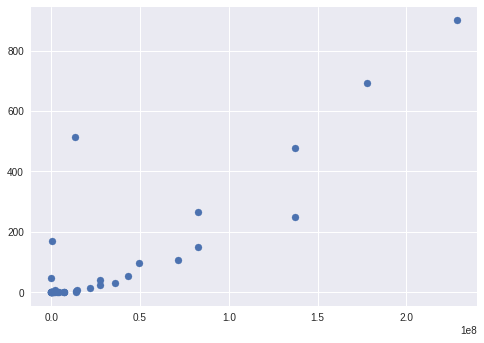

In [0]:
plt.scatter(x_sort, y_sort)

##Define model

In [0]:
def sort_func(x, a, b, c):
  return a * x ** b + c

In [0]:
# x0 = np.ones(3)

##Do optimization

In [0]:
# robust = least_squares(func, x0, loss='soft_l1', args=(x, y))
# res_lsq = least_squares(func, x0, args=(x, y))

popt, pcov = curve_fit(sort_func, x_sort, y_sort)

In [0]:
# print('robust:', np.array_str(robust.x))
# print('least squares', np.array_str(res_lsq.x))

print('curve fit', np.array_str(popt))

curve fit [6.55927057e-12 1.69122714e+00 2.24744831e+01]


##Test model

In [0]:
# y_robust = func(robust.x, x)
# y_least = func(res_lsq.x, x)

y_curv_sort = sort_func(x_sort, *popt)

##Plot results

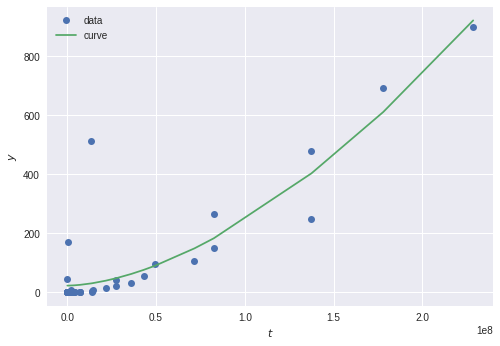

In [0]:
plt.plot(x_sort, y_sort, 'o', label='data')
# plt.plot(x, y_robust, '8', label='robust')
# plt.plot(x, y_least, 'H', label="least")
plt.plot(x_sort, y_curv_sort, label='curve')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend();

#Exchange

##Load Metrics

In [0]:
file = pd.read_csv('/content/gdrive/My Drive/exchange.csv')
grouped = file.groupby(['x']).mean().reset_index()
x_exchange = grouped['x']
y_exchange = grouped['y']

## Plot metrics

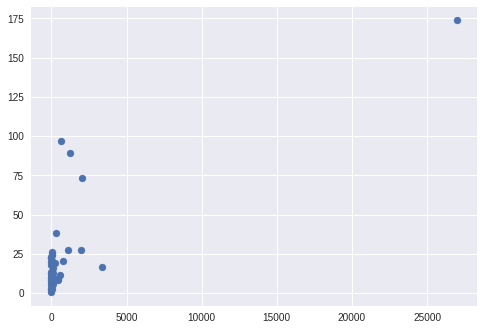

In [0]:
plt.scatter(x_exchange, y_exchange)

## Define model

In [0]:
def exchange_func(x, a, b, c):
  return a * x ** b + c

## Do optimization

In [0]:
popt, pcov = curve_fit(exchange_func, x_exchange, y_exchange)

In [0]:
print('parameters', *popt)

parameters 0.47284270401550454 0.5703326540045224 11.005534014590923


## Test model

In [0]:
y_curv_exchange = exchange_func(x_exchange, *popt)

## Plot results

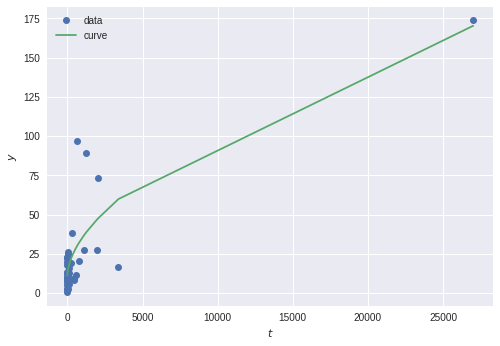

In [0]:
plt.plot(x_exchange, y_exchange, 'o', label='data')
plt.plot(x_exchange, y_curv_exchange, label='curve')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend();

# Sort-Merge Join

## Load metrics

In [0]:
file = pd.read_csv('/content/gdrive/My Drive/sort-merge-join.csv')
grouped = file.groupby(['x0', 'x1']).mean().reset_index()
x_left_smj = grouped['x0']
x_right_smj = grouped['x1']
y_smj = grouped['y']
x0x1 = x_left_smj * x_right_smj
x_smj = np.array([x_left_smj, x_right_smj])

## Plot metrics

[(0, 4000), (0, 500000000000.0), Text(0.5,1,'Zoom window'), None]

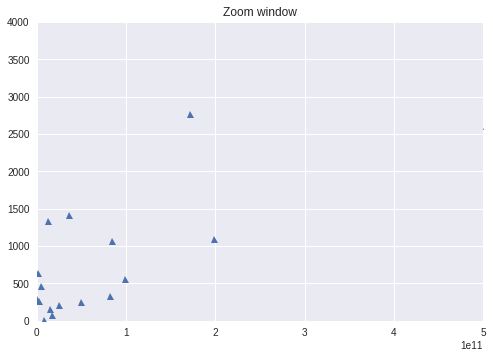

In [0]:
# plt.plot(x_left_smj, y_smj, 'o', label='left table')
# plt.plot(x_right_smj, y_smj, 'X', label='right table')
# plt.plot(x0x1, y_smj, '8', label='all')
# plt.xlabel('$t$')
# plt.ylabel('$y$')
# plt.legend();

figzoom, axzoom = plt.subplots()

# axzoom.plot(x_left_smj, y_smj, 'o', label='left table')
# axzoom.plot(x_right_smj, y_smj, 'X', label='right table')
axzoom.plot(x0x1, y_smj, '^', label='all')
# axzoom.plot(x0x1, y, '8', label='all')
axzoom.set(xlim=(0, 0.5e12), ylim=(0, 4000), autoscale_on=False, title='Zoom window')

## Plot 3D Metrics

Text(0.5,0,'time Label')

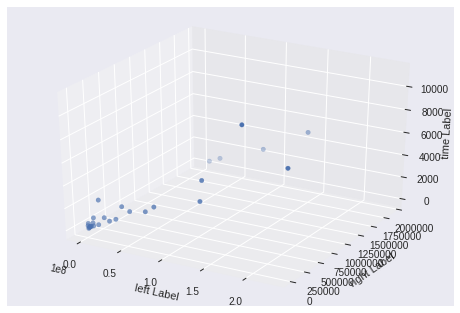

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_left_smj, x_right_smj, y_smj, marker='o')
ax.set_xlabel('left Label')
ax.set_ylabel('right Label')
ax.set_zlabel('time Label')

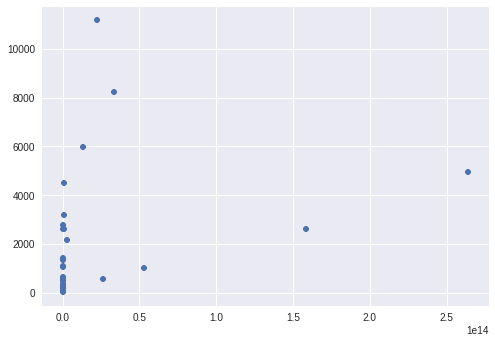

In [0]:
plt.plot(x0x1, y_smj, '8', label='all')

## Define model

In [0]:
def sort_merge_join_func(x, a, b, c):
  return a + b * x[0] + c * x[1] ** 2

## Do optimization

In [0]:
popt, pcov = curve_fit(sort_merge_join_func, x_smj, y_smj, bounds=(0, np.inf))

## Test model

In [0]:
y_curv_smj = sort_merge_join_func(x_smj, *popt)

In [0]:
print('parameters', *popt)

parameters 223.4643209100664 4.060138348953813e-05 1.2245116897638477e-26


## Plot results

[(0, 10000), (0, 100000000000.0), Text(0.5,1,'Zoom window'), None]

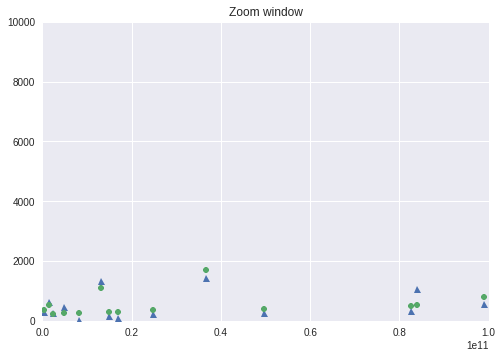

In [0]:
# plt.plot(x0x1, y_smj, 'o', label='data')
# plt.plot(x0x1, y_curv_smj, 'X', label='curve')
# plt.xlabel('$t$')
# plt.ylabel('$y$')
# plt.legend();

figzoom, axzoom = plt.subplots()
axzoom.plot(x0x1, y_smj, '^', label='all')
axzoom.plot(x0x1, y_curv_smj, '8', label='all')
axzoom.set(xlim=(0, 1e11), ylim=(0, 10000), autoscale_on=False, title='Zoom window')

## Plot results 3D

Text(0.5,0,'Z Label')

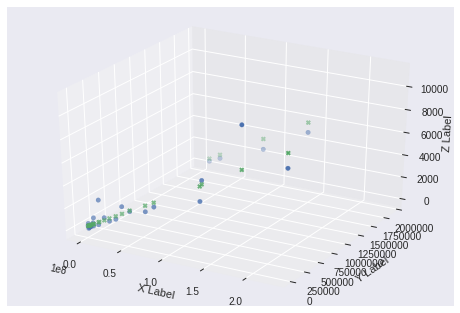

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_left_smj, x_right_smj, y_smj, marker='o')
ax.scatter(x_left_smj, x_right_smj, y_curv_smj, marker='X')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Broadcast

## Load metrics

In [0]:
file = pd.read_csv('/content/gdrive/My Drive/broadcast_all.csv')
grouped = file.groupby(['x']).mean().reset_index()
x_broadcast = grouped['x']
y_broadcast = grouped['y']

## Plot metrics

[(0, 400), (0, 3000000), Text(0.5,1,'Zoom window'), None]

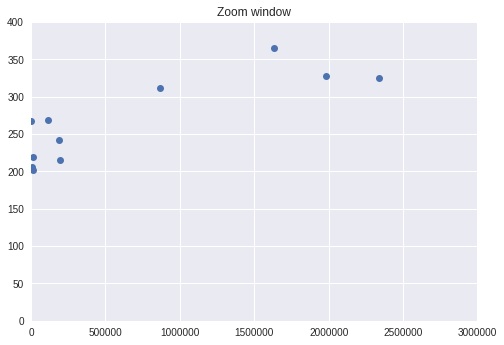

In [0]:
figzoom, axzoom = plt.subplots()
axzoom.plot(x_broadcast, y_broadcast, 'o', label='all')
axzoom.set(xlim=(0, 3000000), ylim=(0, 400), autoscale_on=False, title='Zoom window')

## Define model

In [0]:
def broadcast_func(x, a, b, c):
  return a * x ** b + c

## Do optimization

In [0]:
popt, pcov = curve_fit(broadcast_func, x_broadcast, y_broadcast)

In [0]:
print('parameters', *popt)

parameters 0.00010282094376607356 0.9584981418714688 230.11660651597253


## Test model

In [0]:
y_curv_broadcast = broadcast_func(x_broadcast, *popt)

## Plot results

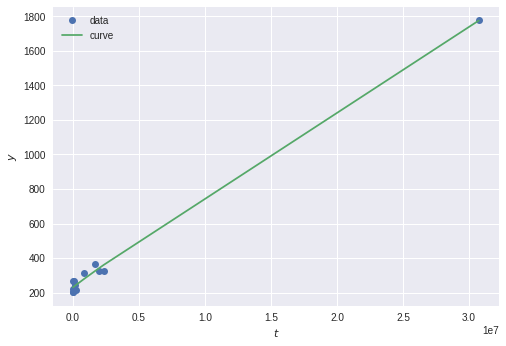

In [0]:
plt.plot(x_broadcast, y_broadcast, 'o', label='data')
plt.plot(x_broadcast, y_curv_broadcast, label='curve')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend();

# Broadcast join

## Load metrics

In [0]:
file = pd.read_csv('/content/gdrive/My Drive/broadcast-join.csv').sort_values('y')
grouped = file.groupby(['x0', 'x1']).mean().reset_index()
x_left_bhj = grouped['x0']
x_right_bhj = grouped['x1']
y_bhj = grouped['y']
# x0x1 = x0 * x1
# x = np.column_stack((x0, x1))
x_bhj = np.array([x_left_bhj, x_right_bhj])

In [0]:
file = pd.read_csv('/content/gdrive/My Drive/broadcast-join.csv').sort_values('y').values

print(np.min(file[:,0]))
print(np.max(file[:,0]))

print(np.min(file[:,0]))
print(np.max(file[:,1]))

X,Y = np.meshgrid(np.arange(np.min(file[:,0]), np.max(file[:,0])+1, 1e6), np.arange(np.min(file[:,1]), np.max(file[:,1])+1, 100000))

XX = X.flatten()
YY = Y.flatten()

order = 1    # 1: linear, 2: quadratic
if order == 1:
  A = np.c_[file[:,0], file[:,1], np.ones(file.shape[0])]
  C, _, _, _ = scipy.linalg.lstsq(A, file[:,2])
  
  Z = C[0]*X + C[1] * Y + C[2]
  print(C)
elif order == 2:
  A = np.c_[np.ones(file.shape[0]), file[:,:2], np.prod(file[:,:2], axis=1), file[:,:2]**2]
  C,_,_,_ = scipy.linalg.lstsq(A, file[:,2])
  
  Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)
  print(C)
  
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_surface(X, Y, Z, rstride=1000000, cstride=10000000, alpha=0.2)
ax.scatter(file[:,0], file[:,1], file[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show();

343096.0
228639132.0
343096.0
1920800.0
[7.66720571e-08 7.17273014e-06 2.01043239e+00]


<IPython.core.display.Javascript object>

## Plot metrics

[(0, 30), (0, 10000000.0), Text(0.5,1,'Zoom window'), None]

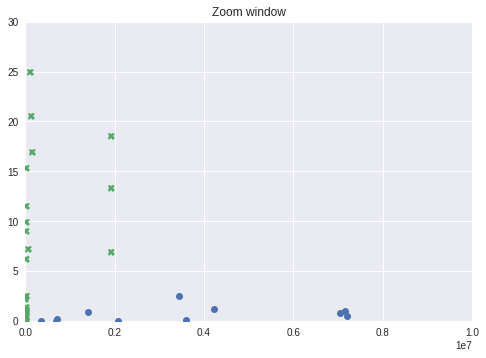

In [0]:
figzoom, axzoom = plt.subplots()

axzoom.plot(x_left_bhj, y_bhj, 'o', label='left table')
axzoom.plot(x_right_bhj, y_bhj, 'X', label='right table')
# axzoom.plot(x0x1, y, '8', label='all')
axzoom.set(xlim=(0, 1e7), ylim=(0, 30), autoscale_on=False,
           title='Zoom window')

## Plot metrics 3D

Text(0.5,0,'time Label')

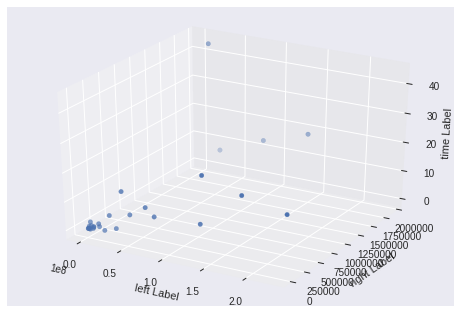

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_left_bhj, x_right_bhj, y_bhj, marker='o')
ax.set_xlabel('left Label')
ax.set_ylabel('right Label')
ax.set_zlabel('time Label')

## Define model

In [0]:
def bhj_func(x, a, b, c):
  return a + b * x[0] + c * x[1] ** 2

## Do optimization

In [0]:
popt, pcov = curve_fit(bhj_func, x_bhj, y_bhj)

In [0]:
print('parameters', *popt)

parameters 2.050112265126992 8.004953978649071e-08 3.6223586315398853e-12


## Test model

In [0]:
y_curv_bhj = bhj_func(x_bhj, *popt)

## Plot results

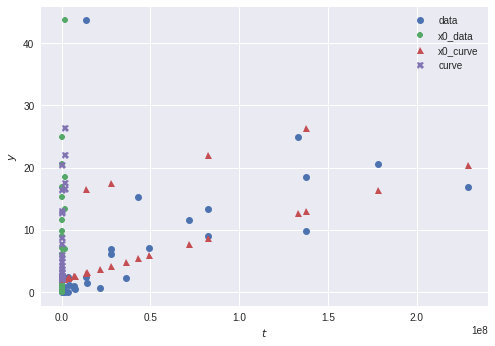

In [0]:
plt.plot(x_left_bhj, y_bhj, 'o', label='data')
plt.plot(x_right_bhj, y_bhj, '8', label='x0_data')
plt.plot(x_left_bhj, y_curv_bhj, '^', label='x0_curve')
plt.plot(x_right_bhj, y_curv_bhj, 'X', label='curve')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend();

## Plot results 3D

Text(0.5,0,'Z Label')

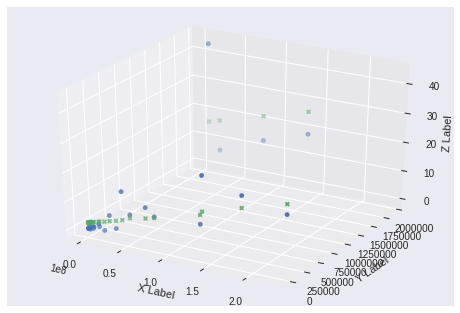

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_left_bhj, x_right_bhj, y_bhj, marker='o')
ax.scatter(x_left_bhj, x_right_bhj, y_curv_bhj, marker='X')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [0]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# some 3-dim points
mean = np.array([0.0,0.0,0.0])
cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
data = np.random.multivariate_normal(mean, cov, 50)

X,Y = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))

XX = X.flatten()
YY = Y.flatten()

order = 2    # 1: linear, 2: quadratic
if order == 1:
  A = np.c_[file[:,0], file[:,1], np.ones(file.shape[0])]
  C, _, _, _ = scipy.linalg.lstsq(A, file[:,2])
  
  Z = C[0]*X + C[1] * Y + C[2]
elif order == 2:
  A = np.c_[np.ones(file.shape[0]), file[:,:2], np.prod(file[:,:2], axis=1), file[:,:2]**2]
  C,_,_,_ = scipy.linalg.lstsq(A, file[:,2])
  
  Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)
  print(C)
  
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_surface(X, Y, Z, rstride=1000000, cstride=10000000, alpha=0.2)
ax.scatter(file[:,0], file[:,1], file[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

order = 2    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

[ 1.10672859e-09  1.52242329e-07  1.00804656e-04 -9.08232289e-14
 -5.08385125e-16 -4.55758366e-11]


<IPython.core.display.Javascript object>

Text(0.5, 0, 'X')

Text(0.5, 0, 'Y')

Text(0.5, 0, 'Z')

(-11431959.75, 240071088.75, -96043.15000000001, 2016840.15)

(-11431959.75, 240071088.75, -96043.15000000001, 2016840.15)

<IPython.core.display.Javascript object>

Text(0.5, 0, 'X')

Text(0.5, 0, 'Y')

Text(0.5, 0, 'Z')

(-3.305835061245463, 3.4225362861547266, -3.275, 2.775)

(-3.305835061245463, 3.4225362861547266, -3.275, 2.775)